In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew

In [3]:
time = pd.read_csv('delivery_time.csv')
time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
time = time.rename(columns={'Delivery Time': 'DelT', 'Sorting Time': 'SortT'})

In [6]:
time.shape

(21, 2)

In [7]:
time.dtypes

DelT     float64
SortT      int64
dtype: object

In [8]:
time.tail

<bound method NDFrame.tail of      DelT  SortT
0   21.00     10
1   13.50      4
2   19.75      6
3   24.00      9
4   29.00     10
5   15.35      6
6   19.00      7
7    9.50      3
8   17.90     10
9   18.75      9
10  19.83      8
11  10.75      4
12  16.68      7
13  11.50      3
14  12.03      3
15  14.88      4
16  13.75      6
17  18.11      7
18   8.00      2
19  17.83      7
20  21.50      5>

In [9]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DelT    21 non-null     float64
 1   SortT   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
time[time.duplicated()].shape
time

,DelT,SortT
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
time_cleaned1 = time.drop_duplicates()
time_cleaned1.shape

(21, 2)

In [12]:
time_cleaned1

,DelT,SortT
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
time.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [14]:
time[time.duplicated()]

,DelT,SortT


<AxesSubplot:>

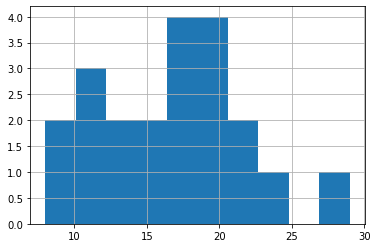

In [15]:
time_cleaned1['DelT'].hist()

<AxesSubplot:>

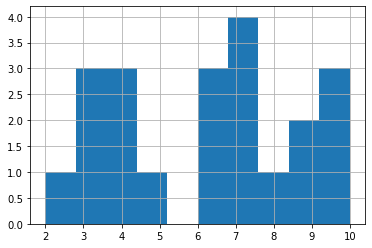

In [17]:
time_cleaned1['SortT'].hist()

In [18]:
time_box = time_cleaned1.dropna()
time_box

,DelT,SortT
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


{'whiskers': [<matplotlib.lines.Line2D at 0x1904746f940>,
 'caps': [<matplotlib.lines.Line2D at 0x1904746ff70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1904746f5e0>,
 'medians': [<matplotlib.lines.Line2D at 0x19047580670>,
 'fliers': [<matplotlib.lines.Line2D at 0x190475809a0>,
 'means': []}

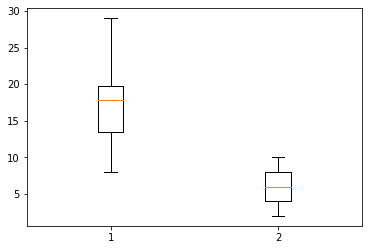

In [19]:
plt.boxplot(time_box)

In [20]:
time.describe()

,DelT,SortT
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [21]:
print(kurtosis(time.DelT))

-0.02558576894549036


In [22]:
print(kurtosis(time.SortT))

-1.1653901357029155


In [23]:
print(skew(time.DelT))

0.326702631656106


In [24]:
print(skew(time.SortT))

0.043680994983108075


In [25]:
time.corr

<bound method DataFrame.corr of      DelT  SortT
0   21.00     10
1   13.50      4
2   19.75      6
3   24.00      9
4   29.00     10
5   15.35      6
6   19.00      7
7    9.50      3
8   17.90     10
9   18.75      9
10  19.83      8
11  10.75      4
12  16.68      7
13  11.50      3
14  12.03      3
15  14.88      4
16  13.75      6
17  18.11      7
18   8.00      2
19  17.83      7
20  21.50      5>

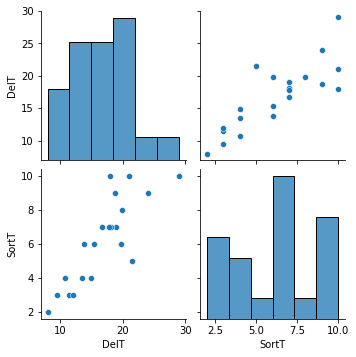

In [27]:
import seaborn as sns
sns.pairplot(time)

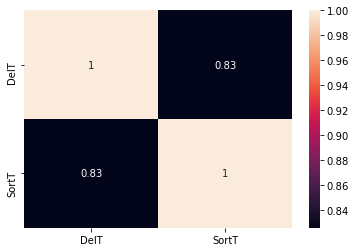

In [28]:
corrMatrix = time.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:>

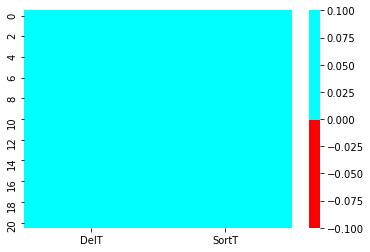

In [31]:
cols = time.columns
colours = ['#FF0000','#00FFFF']
sns.heatmap(time[cols].isnull(), cmap=sns.color_palette(colours))


<AxesSubplot:>

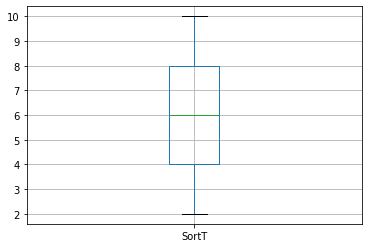

In [32]:
time.boxplot(column='SortT')

<AxesSubplot:>

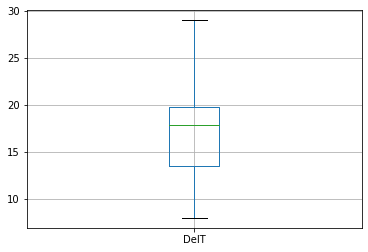

In [33]:
time.boxplot(column='DelT')

<AxesSubplot:>

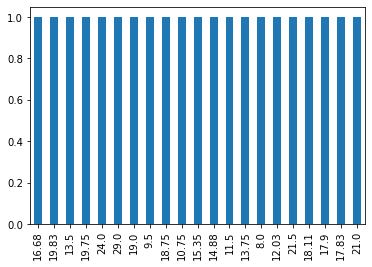

In [34]:
time['DelT'].value_counts().plot.bar()

<AxesSubplot:>

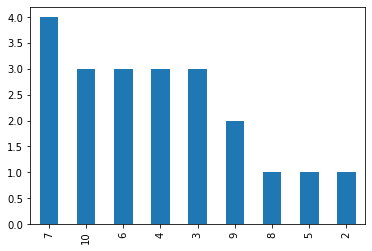

In [35]:
time['SortT'].value_counts().plot.bar()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DelT', ylabel='Density'>

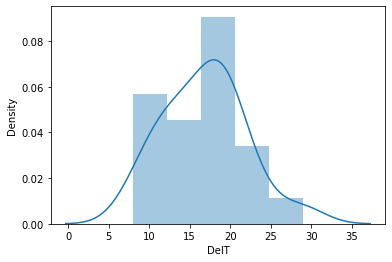

In [36]:
sns.distplot(time['DelT'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortT', ylabel='Density'>

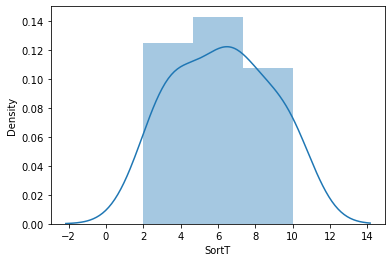

In [37]:
sns.distplot(time['SortT'])

In [39]:
import statsmodels.formula.api as smf
model = smf.ols("DelT~SortT",data = time).fit()

<AxesSubplot:xlabel='DelT', ylabel='SortT'>

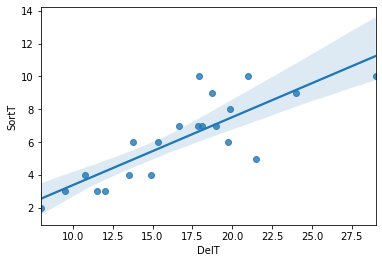

In [40]:
sns.regplot(x='DelT', y='SortT', data=time)

In [41]:
model.params

Intercept    6.582734
SortT        1.649020
dtype: float64

In [42]:
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
SortT        6.387447
dtype: float64 
 Intercept    0.001147
SortT        0.000004
dtype: float64


In [43]:
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DelT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        16:12:43   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
SortT          1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


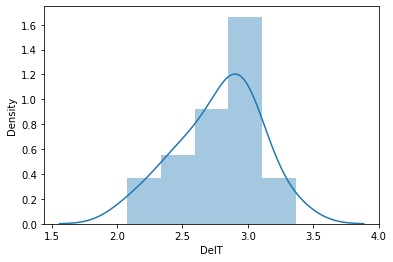

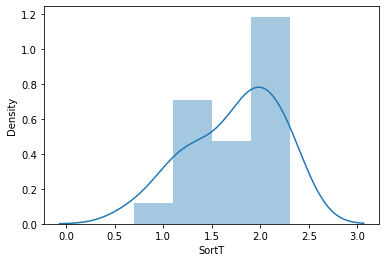

<Figure size 432x288 with 0 Axes>

In [46]:
time_1 = time
time_1['DelT']=np.log(time_1['DelT'])
time_1['SortT']=np.log(time_1['SortT'])
sns.distplot(time_1['DelT'])
fig = plt.figure()
sns.distplot(time_1['SortT'])
fig = plt.figure()

In [47]:
model_2 = smf.ols('SortT~DelT', data=time_1).fit()

In [49]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SortT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.60e-07
Time:                        16:15:45   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
DelT           1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


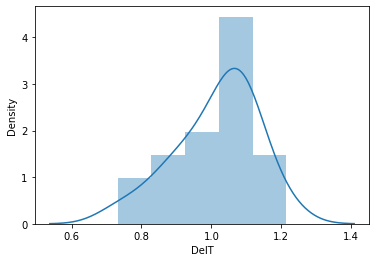

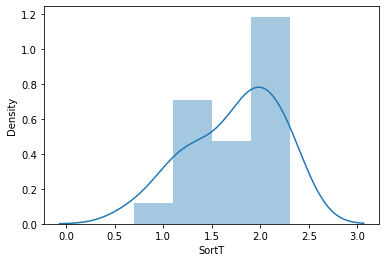

<Figure size 432x288 with 0 Axes>

In [50]:
time_2 = time
time_1['DelT']=np.log(time_1['DelT'])
sns.distplot(time_1['DelT'])
fig = plt.figure()
sns.distplot(time_1['SortT'])
fig = plt.figure()

In [51]:
model_3 = smf.ols("SortT~DelT", data= time_1).fit()

In [53]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SortT   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     69.40
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           9.13e-08
Time:                        16:17:11   Log-Likelihood:                 2.8038
No. Observations:                  21   AIC:                            -1.608
Df Residuals:                      19   BIC:                            0.4814
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8026      0.427     -4.225      0.000      -2.696      -0.910
DelT           3.4823      0.418      8.331      0.000       2.607       4.357
==============================================================================
Omnibus:                        0.491   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.353
Skew:                          -0.289   Prob(JB):                        0.838
Kurtosis:                       2.737   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


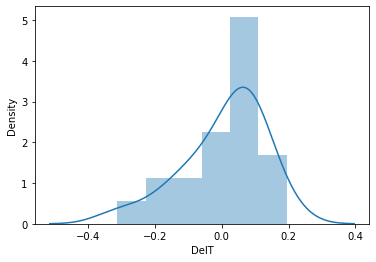

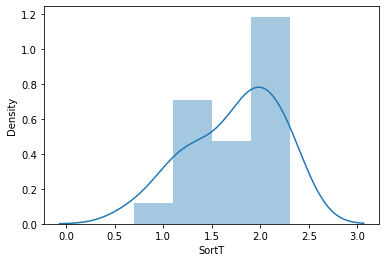

<Figure size 432x288 with 0 Axes>

In [54]:
time_3 = time
time_1['DelT']=np.log(time_1['DelT'])
sns.distplot(time_1['DelT'])
fig = plt.figure()
sns.distplot(time_1['SortT'])
fig = plt.figure()

In [55]:
model_4 = smf.ols("SortT~DelT", data=time_1).fit()

In [56]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SortT   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     70.89
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           7.78e-08
Time:                        16:18:38   Log-Likelihood:                 2.9793
No. Observations:                  21   AIC:                            -1.959
Df Residuals:                      19   BIC:                            0.1305
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7055      0.048     35.350      0.000       1.605       1.807
DelT           3.3499      0.398      8.420      0.000       2.517       4.183
==============================================================================
Omnibus:                        0.812   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.615
Skew:                          -0.391   Prob(JB):                        0.735
Kurtosis:                       2.698   Cond. No.                         8.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
pred = model.predict(time)

In [58]:
pred1 = model.predict(time)

Text(0, 0.5, 'Delivery Time')

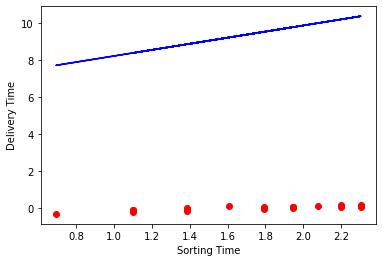

In [60]:
import matplotlib.pyplot as plt
plt.scatter(x=time.SortT, y = time.DelT, color = 'red')
plt.plot(time.SortT, pred, color='blue')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
